## Step 1: Importing Libraries and Loading the Dataset

In this step, we import essential Python libraries for data analysis and hypothesis testing:

- `pandas` for data manipulation
- `scipy.stats` and `statsmodels` for statistical tests
- `seaborn` and `matplotlib.pyplot` for data visualization

We then load the dataset `student-scores.csv` and perform basic exploratory steps:
- Display the first few rows to get a sense of the data
- Check the data types and non-null counts using `.info()`
- Generate summary statistics with `.describe()`
- Check for missing values and duplicate rows

These steps help ensure the dataset is clean and ready for hypothesis testing.

In [190]:
# Import necessary libraries for data manipulation, visualization, and statistical testing
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import spearmanr

# Configure pandas to display full column content without truncation
pd.set_option('display.max_colwidth', None)

In [191]:
# Load the dataset from the specified path
df = pd.read_csv('student-scores.csv')

# Display the first five rows to preview the dataset
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [192]:
# Show data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [193]:
# Generate descriptive statistics for numerical columns
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [194]:
# Check for missing values and duplicate rows in the dataset
print(df.isnull().sum().sum())  # Total number of missing values
print(df.duplicated().sum())    # Total number of duplicate rows

0
0


## Step 2: One-Sample t-Test on Math Scores

In this step, we perform a one-sample t-test to determine whether the average math score of students is significantly different from a hypothesized population mean of 83.

### Breakdown:
- We first inspect the distribution of `math_score` using `.describe()` to understand its central tendency and spread.
- Then, we apply `ttest_1samp()` from `scipy.stats` to test the null hypothesis:
  **H₀:** The true mean math score is equal to 83.
  **H₁:** The true mean math score is different from 83.

The output includes:
- **T-statistic**: Measures how far the sample mean is from the hypothesized mean in terms of standard error.
- **P-value**: Indicates the probability of observing the data if the null hypothesis is true. A small p-value (typically < 0.05) suggests rejecting the null hypothesis.

In [195]:
# Display summary statistics for the 'math_score' column
# This helps us understand the distribution before testing
print(df['math_score'].describe())

# Perform a one-sample t-test to compare the sample mean to a population mean of 83
# Null Hypothesis (H₀): mean(math_score) = 83
# Alternative Hypothesis (H₁): mean(math_score) ≠ 83
t_stat, p_value = ttest_1samp(df['math_score'], popmean=83)

# Print the test statistic and p-value with 3 decimal places
print(f"T-statistic: {t_stat:.3f}")  # Indicates how many standard errors the sample mean is from 83
print(f"P-value: {p_value:.3f}")     # Probability of observing this result under H₀

count    2000.000000
mean       83.452000
std        13.224906
min        40.000000
25%        77.000000
50%        87.000000
75%        93.000000
max       100.000000
Name: math_score, dtype: float64
T-statistic: 1.528
P-value: 0.127


## Step 3: Comparing Subject Scores Between Genders Using Two-Sample t-Tests

In this step, we perform independent two-sample t-tests to compare the average scores of male and female students across multiple subjects.

### Objective:
To test whether there is a statistically significant difference in mean scores between genders for each subject.

### Method:
- We filter the dataset into two groups: male and female students.
- For each subject, we apply `ttest_ind()` with `equal_var=False` to account for unequal variances.
- The null hypothesis for each test is:
  **H₀:** There is no difference in average [subject] score between male and female students.
- We use a significance level of α = 0.05 to make decisions.
- Results are stored in a summary DataFrame showing the test statistic, p-value, decision, and interpretation.

This approach helps identify which subjects show gender-based performance differences.

In [196]:
# Define the list of subjects to test
score_columns = ['math_score', 'history_score', 'physics_score',
                 'chemistry_score', 'biology_score', 'english_score', 'geography_score']

# Create separate DataFrames for female and male students, selecting only score columns
female_df = df[df['gender'] == 'female'][score_columns]
male_df = df[df['gender'] == 'male'][score_columns]

# Initialize an empty list to store test results
score_tests_df = []

# Loop through each subject and perform a two-sample t-test
for col in score_columns:
    # Drop missing values for each gender group
    female_scores = female_df[col].dropna()
    male_scores = male_df[col].dropna()
    
    # Perform Welch's t-test (does not assume equal variances)
    t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=False)
    
    # Define the null hypothesis for this subject
    null_hypothesis = f"There is no difference in average {col.replace('_', ' ')} between male and female students."
    
    # Set significance level
    alpha = 0.05
    
    # Make decision based on p-value
    if p_value < alpha:
        decision = "Reject the null hypothesis"
        interpretation = f"There is a statistically significant difference in {col.replace('_', ' ')} between genders."
    else:
        decision = "Fail to reject the null hypothesis"
        interpretation = f"No statistically significant difference found in {col.replace('_', ' ')} between genders."
    
    # Append results to the list
    score_tests_df.append({
        "Score Type": col,
        "Null Hypothesis": null_hypothesis,
        "T-statistic": round(t_stat, 3),
        "P-value": round(p_value, 3),
        "Decision": decision,
        "Interpretation": interpretation
    })

# Convert the results list into a DataFrame for easy viewing
results_df = pd.DataFrame(score_tests_df)

# Display the summary of hypothesis test results
results_df

,Score Type,Null Hypothesis,T-statistic,P-value,Decision,Interpretation
0,math_score,There is no difference in average math score between male and female students.,2.237,0.025,Reject the null hypothesis,There is a statistically significant difference in math score between genders.
1,history_score,There is no difference in average history score between male and female students.,-0.573,0.566,Fail to reject the null hypothesis,No statistically significant difference found in history score between genders.
2,physics_score,There is no difference in average physics score between male and female students.,2.354,0.019,Reject the null hypothesis,There is a statistically significant difference in physics score between genders.
3,chemistry_score,There is no difference in average chemistry score between male and female students.,-1.358,0.175,Fail to reject the null hypothesis,No statistically significant difference found in chemistry score between genders.
4,biology_score,There is no difference in average biology score between male and female students.,1.192,0.233,Fail to reject the null hypothesis,No statistically significant difference found in biology score between genders.
5,english_score,There is no difference in average english score between male and female students.,-1.726,0.085,Fail to reject the null hypothesis,No statistically significant difference found in english score between genders.
6,geography_score,There is no difference in average geography score between male and female students.,-0.251,0.802,Fail to reject the null hypothesis,No statistically significant difference found in geography score between genders.


## Step 4: One-Proportion Z-Test for Grade A Achievement

We now assess whether the proportion of students achieving Grade A (score ≥ 90) in each subject is significantly greater than 30%.

### Hypothesis:
- **Null Hypothesis (H₀):** The proportion of students achieving Grade A in [subject] is ≤ 0.3
- **Alternative Hypothesis (H₁):** The proportion is > 0.3

### Method:
- Convert each score column into a binary indicator of Grade A achievement.
- Use `proportions_ztest()` to test whether the observed proportion exceeds 0.3.
- Significance level: α = 0.05
- For each subject, we report:
  - Observed proportion
  - Z-statistic and p-value
  - Decision and interpretation

In [197]:
# Define Grade A threshold and significance level
grade_a_threshold = 90
alpha = 0.05

# Create binary columns for Grade A achievement
for col in score_columns:
    new_col = 'graded_a_' + col.replace('_score', '')
    df[new_col] = df[col] >= grade_a_threshold  # True if score ≥ 90

# Initialize list to store test results
results = []

# Loop through each binary Grade A column
for col in df.columns:
    if col.startswith('graded_a_'):
        count = df[col].sum()  # Number of students with Grade A
        nobs = df[col].count()  # Total number of students with valid scores
        proportion = count / nobs  # Observed proportion of Grade A
        stat, pval = proportions_ztest(count=count, nobs=nobs, value=0.3, alternative='larger')

        # Decision logic
        reject_null = pval < alpha
        decision = "Reject H₀" if reject_null else "Fail to reject H₀"
        explanation = (
            f"The test evaluates whether the proportion of students achieving Grade A in {col.replace('graded_a_', '')} "
            f"is greater than 0.3. The observed proportion is {proportion:.2f}. "
            f"{'There is sufficient evidence to conclude it is significantly greater than 0.3' if reject_null else 'There is insufficient evidence to conclude it is greater than 0.3'} "
            f"at α = {alpha} (p = {pval:.4f})."
        )

        # Append results
        results.append({
            'subject': col.replace('graded_a_', ''),
            'proportion': proportion,
            'z_stat': stat,
            'p_value': round(pval, 4),
            'null_hypothesis': f"The proportion of students achieving Grade A in {col.replace('graded_a_', '')} is less than or equal to 0.3",
            'decision': decision,
            'explanation': explanation
        })

# Convert results to DataFrame
ztest_results_df = pd.DataFrame(results)

# Display the results
ztest_results_df

,subject,proportion,z_stat,p_value,null_hypothesis,decision,explanation
0,math,0.3940,8.603168,0.0000,The proportion of students achieving Grade A in math is less than or equal to 0.3,Reject H₀,The test evaluates whether the proportion of students achieving Grade A in math is greater than 0.3. The observed proportion is 0.39. There is sufficient evidence to conclude it is significantly greater than 0.3 at α = 0.05 (p = 0.0000).
1,history,0.2955,-0.441071,0.6704,The proportion of students achieving Grade A in history is less than or equal to 0.3,Fail to reject H₀,The test evaluates whether the proportion of students achieving Grade A in history is greater than 0.3. The observed proportion is 0.30. There is insufficient evidence to conclude it is greater than 0.3 at α = 0.05 (p = 0.6704).
2,physics,0.3280,2.667175,0.0038,The proportion of students achieving Grade A in physics is less than or equal to 0.3,Reject H₀,The test evaluates whether the proportion of students achieving Grade A in physics is greater than 0.3. The observed proportion is 0.33. There is sufficient evidence to conclude it is significantly greater than 0.3 at α = 0.05 (p = 0.0038).
3,chemistry,0.2975,-0.244562,0.5966,The proportion of students achieving Grade A in chemistry is less than or equal to 0.3,Fail to reject H₀,The test evaluates whether the proportion of students achieving Grade A in chemistry is greater than 0.3. The observed proportion is 0.30. There is insufficient evidence to conclude it is greater than 0.3 at α = 0.05 (p = 0.5966).
4,biology,0.2955,-0.441071,0.6704,The proportion of students achieving Grade A in biology is less than or equal to 0.3,Fail to reject H₀,The test evaluates whether the proportion of students achieving Grade A in biology is greater than 0.3. The observed proportion is 0.30. There is insufficient evidence to conclude it is greater than 0.3 at α = 0.05 (p = 0.6704).
5,english,0.3130,1.253741,0.1050,The proportion of students achieving Grade A in english is less than or equal to 0.3,Fail to reject H₀,The test evaluates whether the proportion of students achieving Grade A in english is greater than 0.3. The observed proportion is 0.31. There is insufficient evidence to conclude it is greater than 0.3 at α = 0.05 (p = 0.1050).
6,geography,0.2820,-1.788960,0.9632,The proportion of students achieving Grade A in geography is less than or equal to 0.3,Fail to reject H₀,The test evaluates whether the proportion of students achieving Grade A in geography is greater than 0.3. The observed proportion is 0.28. There is insufficient evidence to conclude it is greater than 0.3 at α = 0.05 (p = 0.9632).


## Step 5: Two-Proportion Z-Test Between Genders for Grade A Achievement

We now test whether male students are significantly less likely than female students to achieve Grade A (score ≥ 90) in each subject.

### Hypothesis:
- **Null Hypothesis (H₀):** The proportion of male students achieving Grade A in [subject] is ≥ that of female students.
- **Alternative Hypothesis (H₁):** The proportion of male students is < that of female students.

### Method:
- For each subject, we use the binary Grade A columns created earlier.
- We calculate the number and proportion of Grade A achievers for each gender.
- We apply a one-tailed two-proportion z-test (`alternative='smaller'`) to test if the male proportion is significantly lower.
- Significance level: α = 0.05
- Results include:
  - Proportions for each gender
  - Z-statistic and p-value
  - Decision and interpretation

In [198]:
# Initialize results list
results = []

# Loop through each binary Grade A column
for col in df.columns:
    if col.startswith('graded_a_'):
        subject = col.replace('graded_a_', '')

        # Extract binary Grade A data for each gender
        male = df[df['gender'] == 'male'][col]
        female = df[df['gender'] == 'female'][col]

        # Count Grade A achievers and total observations
        count = [male.sum(), female.sum()]
        nobs = [male.count(), female.count()]

        # Perform one-tailed two-proportion z-test (male < female)
        stat, pval = proportions_ztest(count=count, nobs=nobs, alternative='smaller')

        # Decision logic
        reject_null = pval < alpha
        decision = "Reject H₀" if reject_null else "Fail to reject H₀"
        explanation = (
            f"This test evaluates whether the proportion of male students achieving Grade A in {subject} "
            f"is lower than that of female students. The observed proportions are "
            f"{count[0] / nobs[0]:.2%} for males and {count[1] / nobs[1]:.2%} for females. "
            f"{'There is sufficient evidence to conclude that the male proportion is significantly lower' if reject_null else 'There is insufficient evidence to conclude that the male proportion is lower'} "
            f"at α = {alpha} (p = {pval:.4f})."
        )

        # Append results
        results.append({
            'subject': subject,
            'male_proportion': count[0] / nobs[0],
            'female_proportion': count[1] / nobs[1],
            'z_stat': stat,
            'p_value': round(pval, 4),
            'null_hypothesis': f"The proportion of male students achieving Grade A in {subject} is greater than or equal to that of female students",
            'decision': decision,
            'explanation': explanation
        })

# Convert results to DataFrame
ztest_gender_df = pd.DataFrame(results)

# Display results
ztest_gender_df

,subject,male_proportion,female_proportion,z_stat,p_value,null_hypothesis,decision,explanation
0,math,0.408818,0.379242,1.353446,0.9120,The proportion of male students achieving Grade A in math is greater than or equal to that of female students,Fail to reject H₀,This test evaluates whether the proportion of male students achieving Grade A in math is lower than that of female students. The observed proportions are 40.88% for males and 37.92% for females. There is insufficient evidence to conclude that the male proportion is lower at α = 0.05 (p = 0.9120).
1,history,0.282565,0.308383,-1.265288,0.1029,The proportion of male students achieving Grade A in history is greater than or equal to that of female students,Fail to reject H₀,This test evaluates whether the proportion of male students achieving Grade A in history is lower than that of female students. The observed proportions are 28.26% for males and 30.84% for females. There is insufficient evidence to conclude that the male proportion is lower at α = 0.05 (p = 0.1029).
2,physics,0.348697,0.307385,1.967617,0.9754,The proportion of male students achieving Grade A in physics is greater than or equal to that of female students,Fail to reject H₀,This test evaluates whether the proportion of male students achieving Grade A in physics is lower than that of female students. The observed proportions are 34.87% for males and 30.74% for females. There is insufficient evidence to conclude that the male proportion is lower at α = 0.05 (p = 0.9754).
3,chemistry,0.294589,0.300399,-0.284181,0.3881,The proportion of male students achieving Grade A in chemistry is greater than or equal to that of female students,Fail to reject H₀,This test evaluates whether the proportion of male students achieving Grade A in chemistry is lower than that of female students. The observed proportions are 29.46% for males and 30.04% for females. There is insufficient evidence to conclude that the male proportion is lower at α = 0.05 (p = 0.3881).
4,biology,0.294589,0.296407,-0.089096,0.4645,The proportion of male students achieving Grade A in biology is greater than or equal to that of female students,Fail to reject H₀,This test evaluates whether the proportion of male students achieving Grade A in biology is lower than that of female students. The observed proportions are 29.46% for males and 29.64% for females. There is insufficient evidence to conclude that the male proportion is lower at α = 0.05 (p = 0.4645).
5,english,0.291583,0.334331,-2.061347,0.0196,The proportion of male students achieving Grade A in english is greater than or equal to that of female students,Reject H₀,This test evaluates whether the proportion of male students achieving Grade A in english is lower than that of female students. The observed proportions are 29.16% for males and 33.43% for females. There is sufficient evidence to conclude that the male proportion is significantly lower at α = 0.05 (p = 0.0196).
6,geography,0.275551,0.288423,-0.639654,0.2612,The proportion of male students achieving Grade A in geography is greater than or equal to that of female students,Fail to reject H₀,This test evaluates whether the proportion of male students achieving Grade A in geography is lower than that of female students. The observed proportions are 27.56% for males and 28.84% for females. There is insufficient evidence to conclude that the male proportion is lower at α = 0.05 (p = 0.2612).


## Step 6: Exploring the Relationship Between Average Score and Self-Study Hours

In this step, we investigate whether students who study more tend to perform better academically.

### Actions:
1. **Average Score Calculation**: We compute each student's average score across all subjects.
2. **Distribution Plots**:
   - Histogram of average scores
   - Histogram of weekly self-study hours
   - Both include KDE curves to visualize density
3. **Normality Check**:
   - Shapiro-Wilk test is used to assess normality of both variables.
4. **Correlation Test**:
   - Spearman's rank correlation is applied due to potential non-normality.
   - This non-parametric test evaluates monotonic relationships.

### Interpretation:
- A significant positive Spearman correlation would suggest that students who study more tend to have higher average scores.

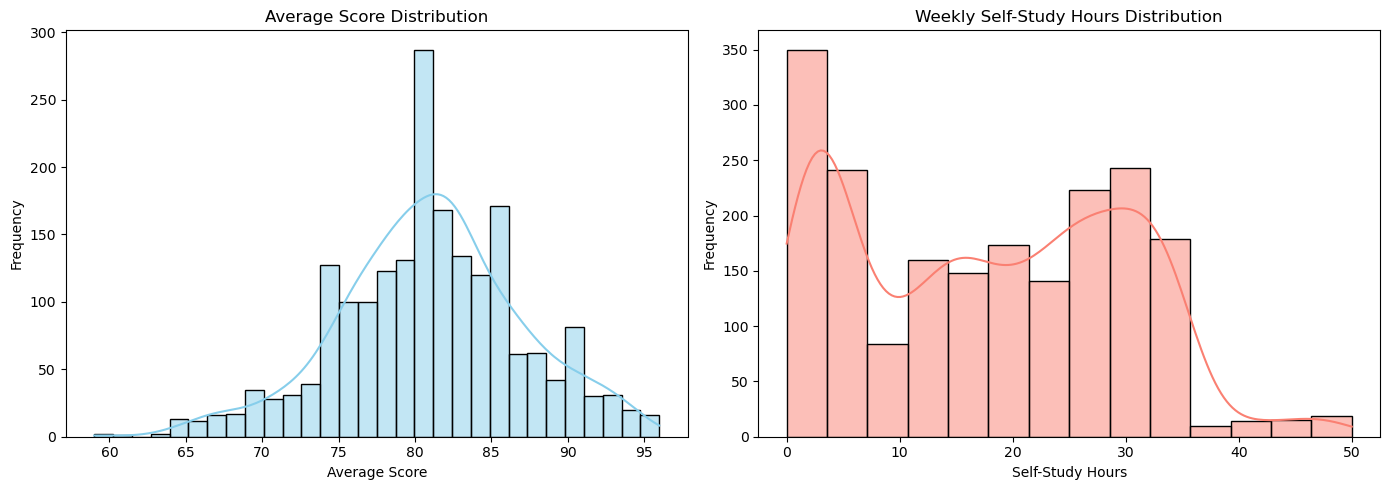

In [199]:
# Calculate average score across all subjects
df['average_score'] = round(df[score_columns].mean(axis=1), 0)

# Set up side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot distribution of average scores
sns.histplot(df['average_score'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Average Score Distribution')
axes[0].set_xlabel('Average Score')
axes[0].set_ylabel('Frequency')

# Plot distribution of weekly self-study hours
sns.histplot(df['weekly_self_study_hours'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Weekly Self-Study Hours Distribution')
axes[1].set_xlabel('Self-Study Hours')
axes[1].set_ylabel('Frequency')

# Improve layout spacing
plt.tight_layout()
plt.show()

In [200]:
# Check normality using Shapiro-Wilk test
print("Shapiro-Wilk Test for Normality:")
print("Average Score:", stats.shapiro(df['average_score']))
print("Self-Study Hours:", stats.shapiro(df['weekly_self_study_hours']))

Shapiro-Wilk Test for Normality:
Average Score: ShapiroResult(statistic=np.float64(0.991839386738163), pvalue=np.float64(3.868347577194377e-09))
Self-Study Hours: ShapiroResult(statistic=np.float64(0.9411398903562628), pvalue=np.float64(1.717544650002188e-27))


### 📊 Normality Check: Shapiro-Wilk Test Results

To determine whether the variables follow a normal distribution, we applied the Shapiro-Wilk test:

- **Average Score**: W = 0.992, p < 0.000000004
- **Self-Study Hours**: W = 0.941, p < 0.0000000000000000000000002

### 🧠 Interpretation:
Both p-values are far below the significance threshold (α = 0.05), indicating strong evidence **against** the null hypothesis of normality. Therefore:

- **Average Score** and **Weekly Self-Study Hours** are **not normally distributed**.
- This justifies the use of **non-parametric methods** like Spearman's rank correlation for further analysis.

In [201]:
# Perform Spearman correlation test
corr, p_value = spearmanr(df['average_score'], df['weekly_self_study_hours'])

# Display correlation results
print(f"\nSpearman correlation coefficient: {corr:.3f}")
print(f"p-value: {p_value:.3e}")


Spearman correlation coefficient: 0.458
p-value: 1.772e-104


### 🔗 Spearman Correlation: Average Score vs. Self-Study Hours

To assess the relationship between students' average academic performance and their weekly self-study hours, we applied Spearman's rank correlation—a non-parametric test suitable for non-normally distributed data.

- **Spearman correlation coefficient (ρ)**: 0.458  
- **p-value**: 1.772 × 10⁻¹⁰⁴

### 🧠 Interpretation:
The positive coefficient (ρ = 0.458) indicates a **moderate positive association**—students who spend more time on self-study tend to have higher average scores.  
The extremely small p-value provides **strong statistical evidence** that this relationship is **not due to chance**, and is significant at any conventional α level.

This suggests that self-directed study time is meaningfully linked to academic success in this dataset.